In [220]:
!pip install scikit-learn==1.3.0

In [171]:
!pip install pandas==2.0.3

In [172]:
#Showing the shape of the data.
import numpy as np
import pandas as pd

# Loading the dataset
df = pd.read_csv('diabetic_data.csv', keep_default_na=False)

# Displaying the shape of the data
print("Shape of the data:", df.shape)
print("Columns of the DataFrame:", df.columns)


Shape of the data: (101766, 50)
Columns of the DataFrame: Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [173]:
# Deleting the column 'encounter_id'

df.drop(columns=['encounter_id'], inplace=True)
print("Columns of the DataFrame:", df.columns)

Columns of the DataFrame: Index(['patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [174]:
# Identifying the columns containing '?'
columns_with_question_mark = df.columns[df.isin(['?']).any()]

# Replace '?' with NaN only in columns containing '?'
df[columns_with_question_mark] = df[columns_with_question_mark].replace('?', np.nan)

# Summary of missing values after replacing '?'
missing_after = df.isnull().sum()

print("\nMissing Values After Replacement:")
print(missing_after)


Missing Values After Replacement:
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide

In [175]:
# Replacing '<30' with 1 and '>30' and 'NO' with 0
df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0}, inplace=True)

# Displaying the unique values in the 'readmitted' column to verify the replacement
print("Unique values in 'readmitted' column after replacement:", df['readmitted'].unique())
print(df.head(20))
df.shape

Unique values in 'readmitted' column after replacement: [0 1]
    patient_nbr             race  gender       age weight  admission_type_id  \
0       8222157        Caucasian  Female    [0-10)    NaN                  6   
1      55629189        Caucasian  Female   [10-20)    NaN                  1   
2      86047875  AfricanAmerican  Female   [20-30)    NaN                  1   
3      82442376        Caucasian    Male   [30-40)    NaN                  1   
4      42519267        Caucasian    Male   [40-50)    NaN                  1   
5      82637451        Caucasian    Male   [50-60)    NaN                  2   
6      84259809        Caucasian    Male   [60-70)    NaN                  3   
7     114882984        Caucasian    Male   [70-80)    NaN                  1   
8      48330783        Caucasian  Female   [80-90)    NaN                  2   
9      63555939        Caucasian  Female  [90-100)    NaN                  3   
10     89869032  AfricanAmerican  Female   [40-50)    NaN 

(101766, 49)

In [176]:
# Checking the data type of each column
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 

In [177]:

# Calculate percentage of missing values in each column
missing_percentage = (df.isna().sum() / len(df)) * 100

# Drop columns with more than 90% missing values
columns_to_drop = missing_percentage[missing_percentage > 90]
dropped_columns_info = columns_to_drop.reset_index().rename(columns={"index": "Column", 0: "Missing Percentage"})
dropped_columns_info = dropped_columns_info.sort_values(by="Missing Percentage", ascending=False)

# Display dropped columns and their missing percentages
print("Columns dropped due to more than 90% missing values:")
print(dropped_columns_info)
print("\n")

# Drop columns with more than 90% missing values
df.drop(columns=columns_to_drop.index, inplace=True)

# Display the resulting dataframe
print("Shape of resulting dataframe after dropping columns:")
print(df.shape)


Columns dropped due to more than 90% missing values:
   Column  Missing Percentage
0  weight           96.858479


Shape of resulting dataframe after dropping columns:
(101766, 48)


In [178]:
# Droping the columns with no variations or near-zero variance
columns_to_drop = ['examide', 'citoglipton', 'repaglinide', 'nateglinide', 'chlorpropamide', 
                   'glimepiride', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 
                   'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 
                   'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

df.drop(columns=columns_to_drop, inplace=True)

# Displaying the resulting dataframe
print("Shape of resulting dataframe after dropping columns:")
print(df.shape)
df.head(30)

Shape of resulting dataframe after dropping columns:
(101766, 31)


patient_nbr             race  gender       age  admission_type_id  \
0       8222157        Caucasian  Female    [0-10)                  6   
1      55629189        Caucasian  Female   [10-20)                  1   
2      86047875  AfricanAmerican  Female   [20-30)                  1   
3      82442376        Caucasian    Male   [30-40)                  1   
4      42519267        Caucasian    Male   [40-50)                  1   
5      82637451        Caucasian    Male   [50-60)                  2   
6      84259809        Caucasian    Male   [60-70)                  3   
7     114882984        Caucasian    Male   [70-80)                  1   
8      48330783        Caucasian  Female   [80-90)                  2   
9      63555939        Caucasian  Female  [90-100)                  3   
10     89869032  AfricanAmerican  Female   [40-50)                  1   
11     77391171  AfricanAmerican    Male   [60-70)                  2   
12     85504905        Caucasian  Female   [40-50)                  1   
13     77586282        Caucasian    Male   [80-90)                  1   
14     49726791  AfricanAmerican  Female   [60-70)                  3   
15     86328819  AfricanAmerican    Male   [60-70)                  1   
16     92519352  AfricanAmerican    Male   [50-60)                  1   
17    108662661        Caucasian  Female   [50-60)                  1   
18    107389323  AfricanAmerican    Male   [70-80)                  1   
19     69422211              NaN    Male   [70-80)                  3   
20     22864131              NaN  Female   [50-60)                  2   
21     21239181              NaN    Male   [60-70)                  2   
22     63000108  AfricanAmerican  Female   [70-80)                  2   
23    107400762        Caucasian  Female   [80-90)                  2   
24     62718876  AfricanAmerican  Female   [70-80)                  3   
25     21861756            Other  Female   [50-60)                  1   
26     40523301        Caucasian    Male   [80-90)                  1   
27    115196778        Caucasian  Female   [50-60)                  1   
28     41606064        Caucasian    Male   [20-30)                  2   
29     18196434        Caucasian  Female   [80-90)                  1   

    discharge_disposition_id  admission_source_id  time_in_hospital  \
0                         25                    1                 1   
1                          1                    7                 3   
2                          1                    7                 2   
3                          1                    7                 2   
4                          1                    7                 1   
5                          1                    2                 3   
6                          1                    2                 4   
7                          1                    7                 5   
8                          1                    4                13   
9                          3                    4                12   
10                         1                    7                 9   
11                         1                    4                 7   
12                         3                    7                 7   
13                         6                    7                10   
14                         1                    2                 1   
15                         3                    7                12   
16                         1                    7                 4   
17                         1                    7                 3   
18                         1                    7                 5   
19                         6                    2                 6   
20                         1                    4                 2   
21                         1                    4                 2   
22                         1                    4                 2   
23                         6        

In [179]:
most_frequent_percentage = (df.mode().iloc[0] == df).sum() / len(df)

# Identifying near-zero variance columns (where the most frequent value appears more than 90% of the time)
near_zero_variance_columns = most_frequent_percentage[most_frequent_percentage > 0.9].index

# Droping near-zero variance columns from the dataset
df.drop(columns=near_zero_variance_columns, inplace=True)

# Displaying the resulting dataframe
print("Shape of resulting dataframe after dropping near-zero variance columns:")
print(df.shape)

Shape of resulting dataframe after dropping near-zero variance columns:
(101766, 28)


In [180]:
# Droping rows with null values
df.dropna(inplace=True )

# Printing the shape of the DataFrame after dropping rows with null values
print("Shape of DataFrame after dropping rows with null values:", df.shape)


Shape of DataFrame after dropping rows with null values: (26755, 28)


In [181]:
# Defining numerical columns excluding specific ones
numerical_columns = df.select_dtypes(include=[np.number]).columns
columns_to_exclude = ['patient_nbr', 'number_outpatient', 'number_emergency', 'number_inpatient', 'readmitted']
numerical_columns = [col for col in numerical_columns if col not in columns_to_exclude]

# Subset the DataFrame with selected numerical columns
numerical_df = df[numerical_columns]

# Displaying the selected numerical columns
print("Selected numerical columns for analysis:")
print(numerical_df.columns)


Selected numerical columns for analysis:
Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses'],
      dtype='object')


In [182]:
# Defining a function to remove outliers using IQR
def remove_outliers_iqr(df, columns, threshold=1.5):
    """
    Remove outliers from DataFrame using the Interquartile Range (IQR) method.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data.
        columns (list): List of columns to check for outliers.
        threshold (float): Threshold value for considering outliers. Default is 1.5.
    
    Returns:
        DataFrame: DataFrame with outliers removed.
    """
    cleaned_df = df.copy()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Specifying numerical columns for outlier removal
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses']

# Removing outliers using IQR method
cleaned_df = remove_outliers_iqr(df, numerical_columns)

# Displaying the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers using IQR:", cleaned_df.shape)


Shape of DataFrame after removing outliers using IQR: (24293, 28)


In [183]:
# Define the list of column names to be dropped
columns_to_drop = ['patient_nbr' ]

# Drop the specified columns from the DataFrame
cleaned_df.drop(columns=columns_to_drop, inplace=True)
cleaned_df.shape


(24293, 27)

# Visualization

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns


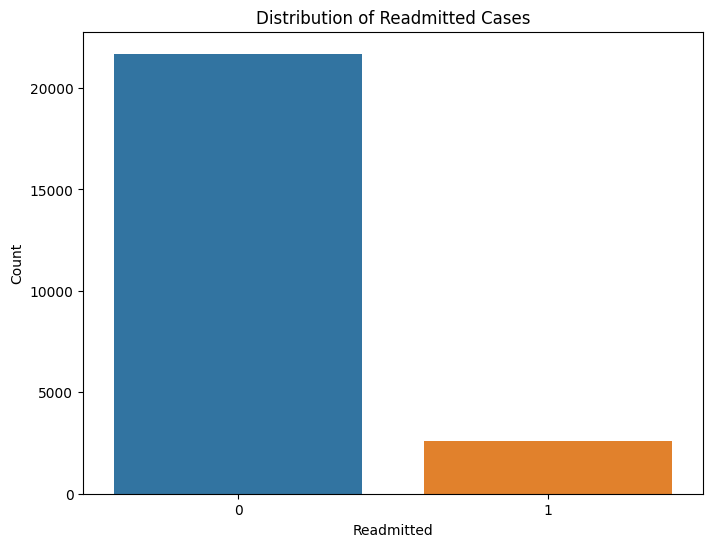

In [185]:
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=cleaned_df)
plt.title('Distribution of Readmitted Cases')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.show()

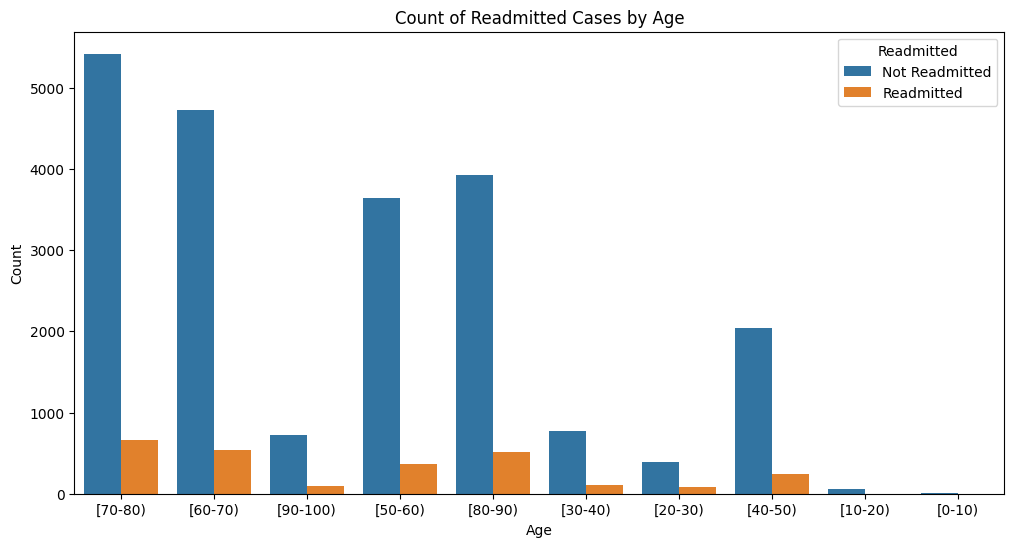

In [186]:
# Ploting the count of readmitted cases against age
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='readmitted', data=cleaned_df)
plt.title('Count of Readmitted Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()

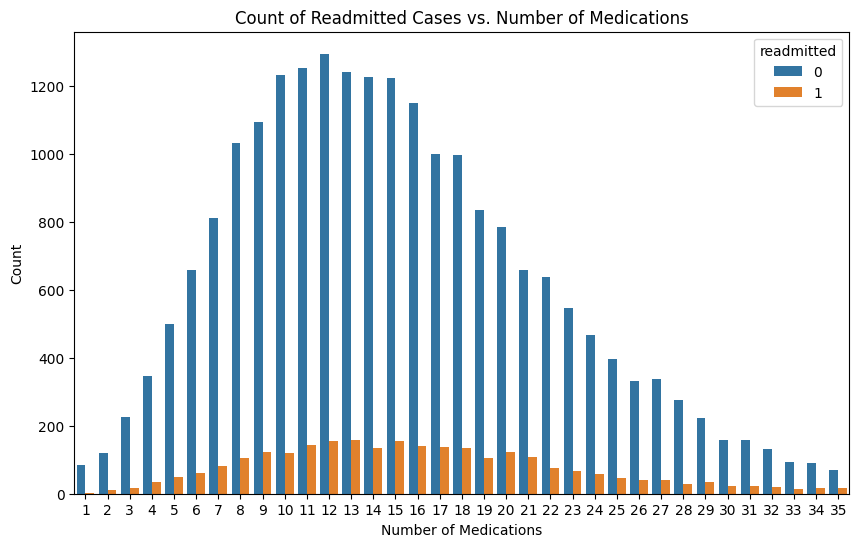

In [187]:
# Ploting a graph that displays the count of target variable against the number of medications
plt.figure(figsize=(10, 6))
sns.countplot(x='num_medications', hue='readmitted', data=cleaned_df)
plt.title('Count of Readmitted Cases vs. Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.show()

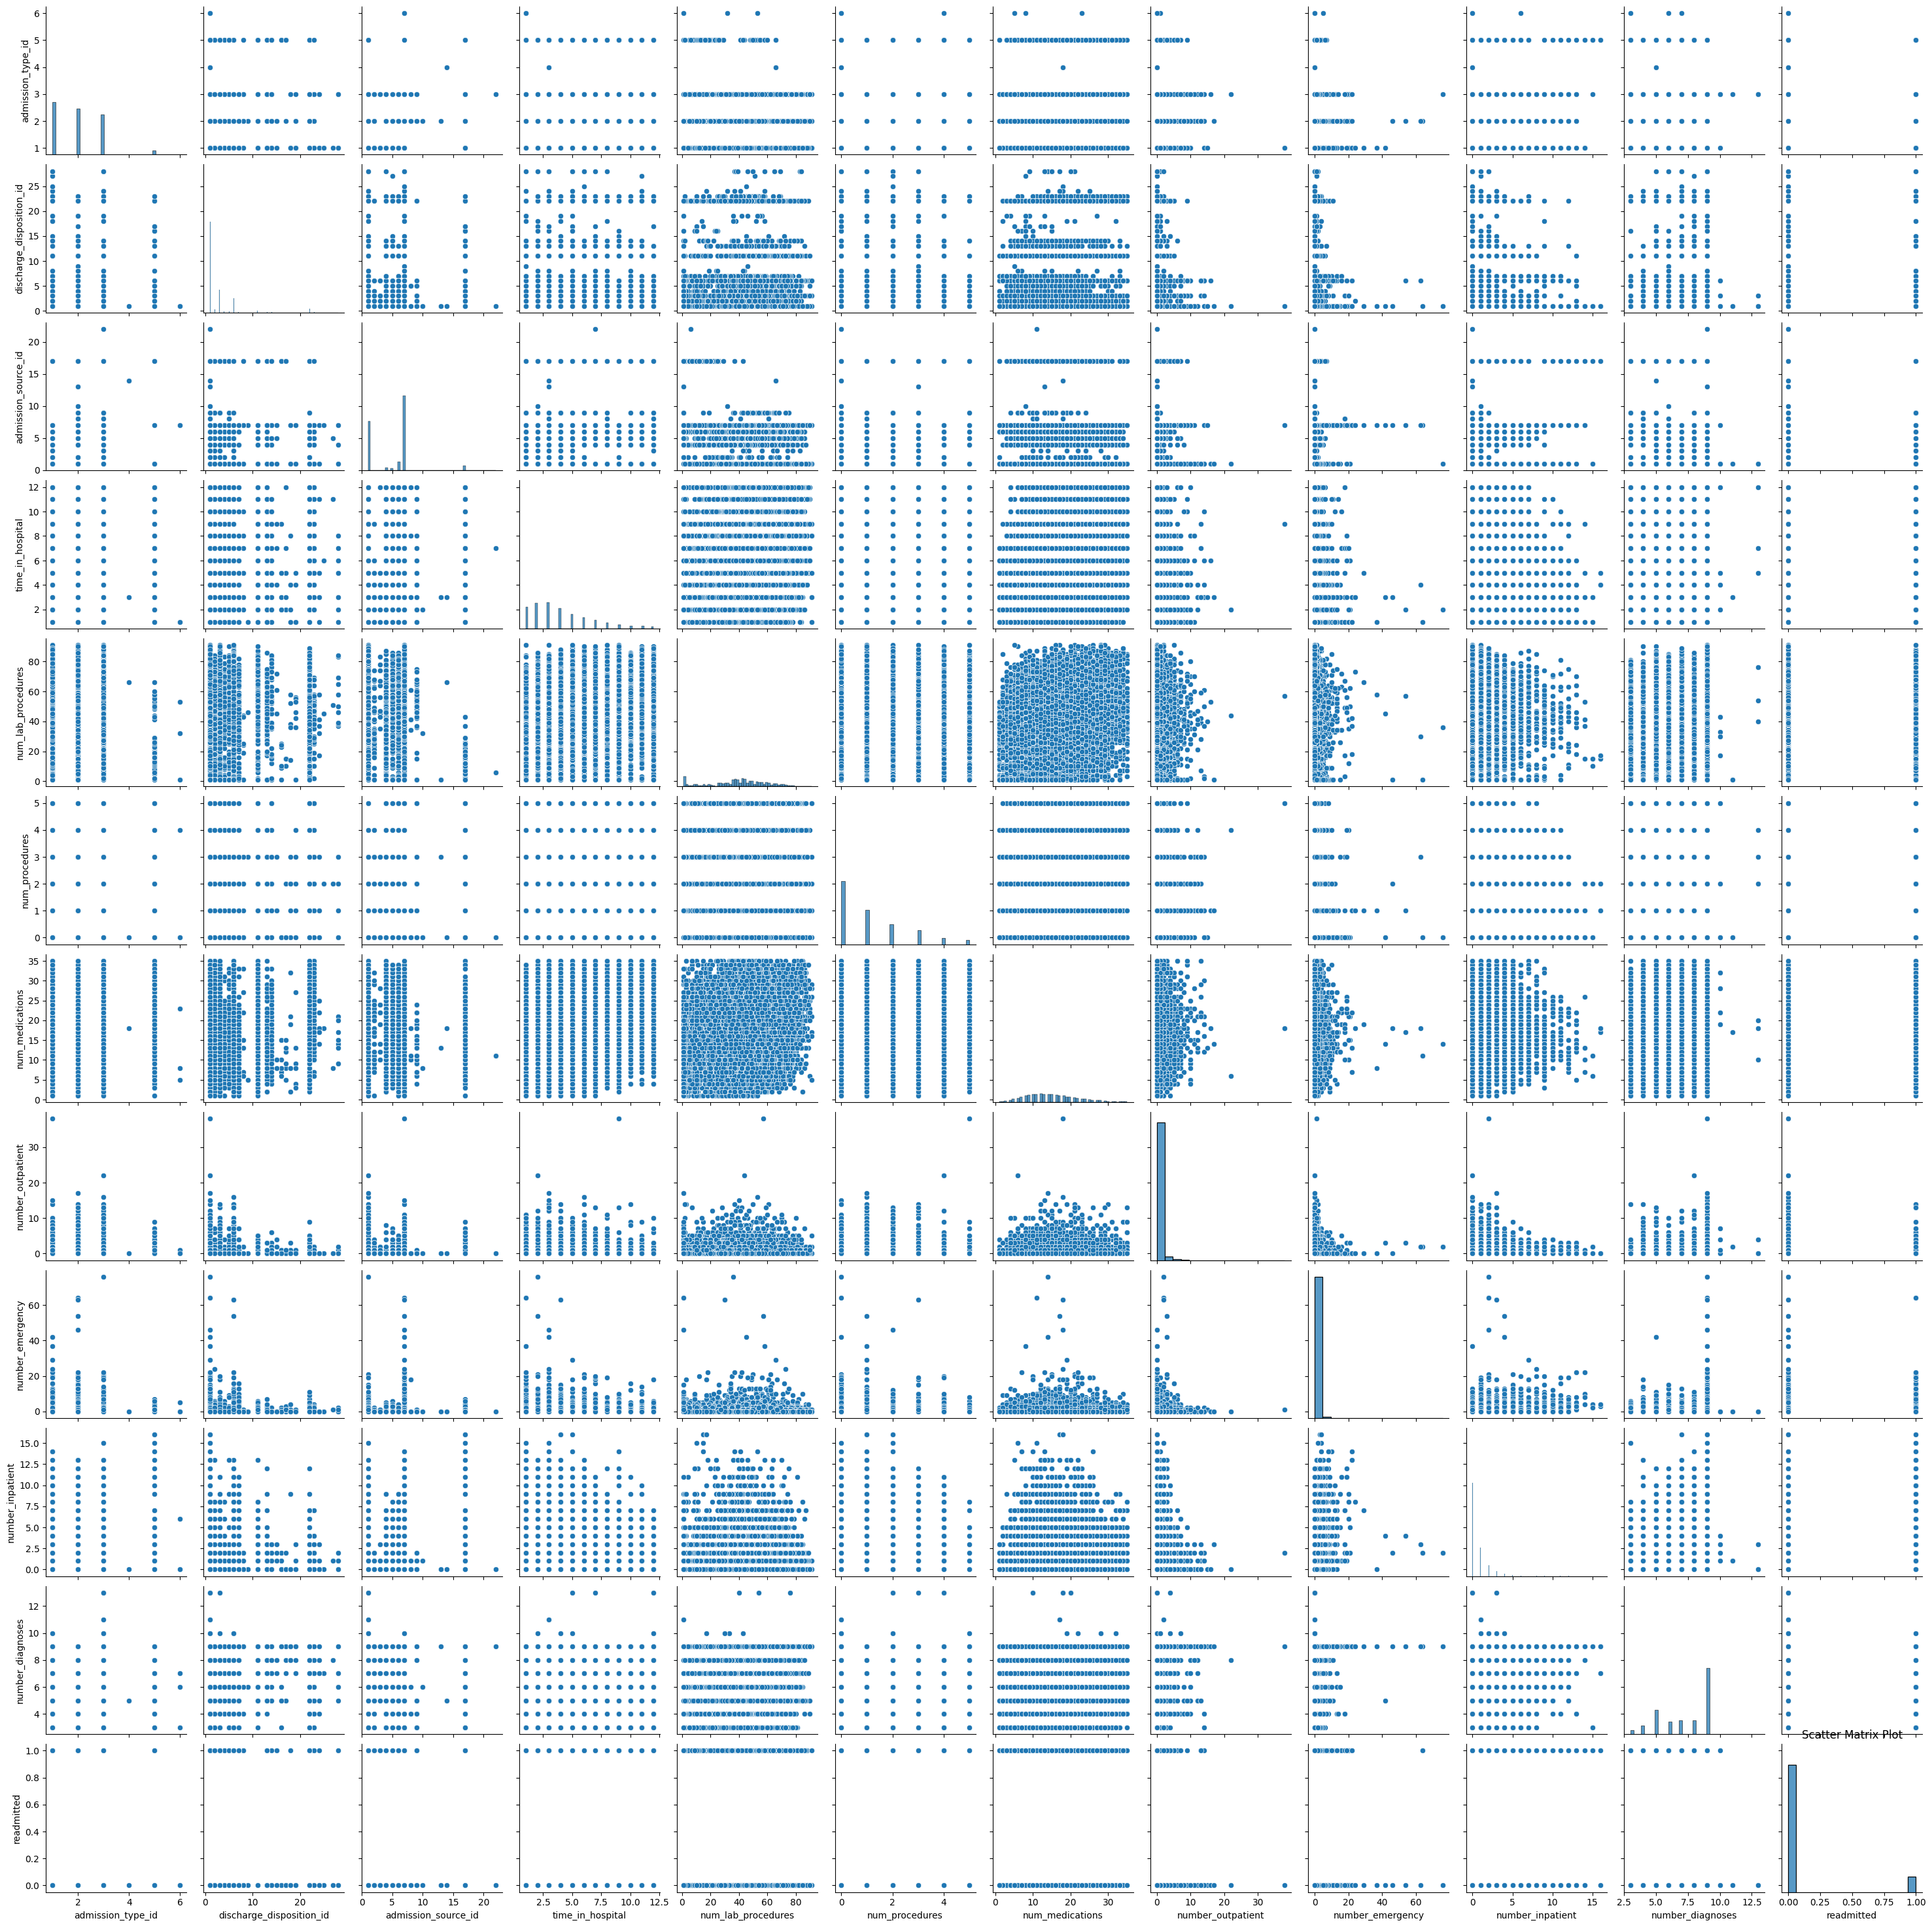

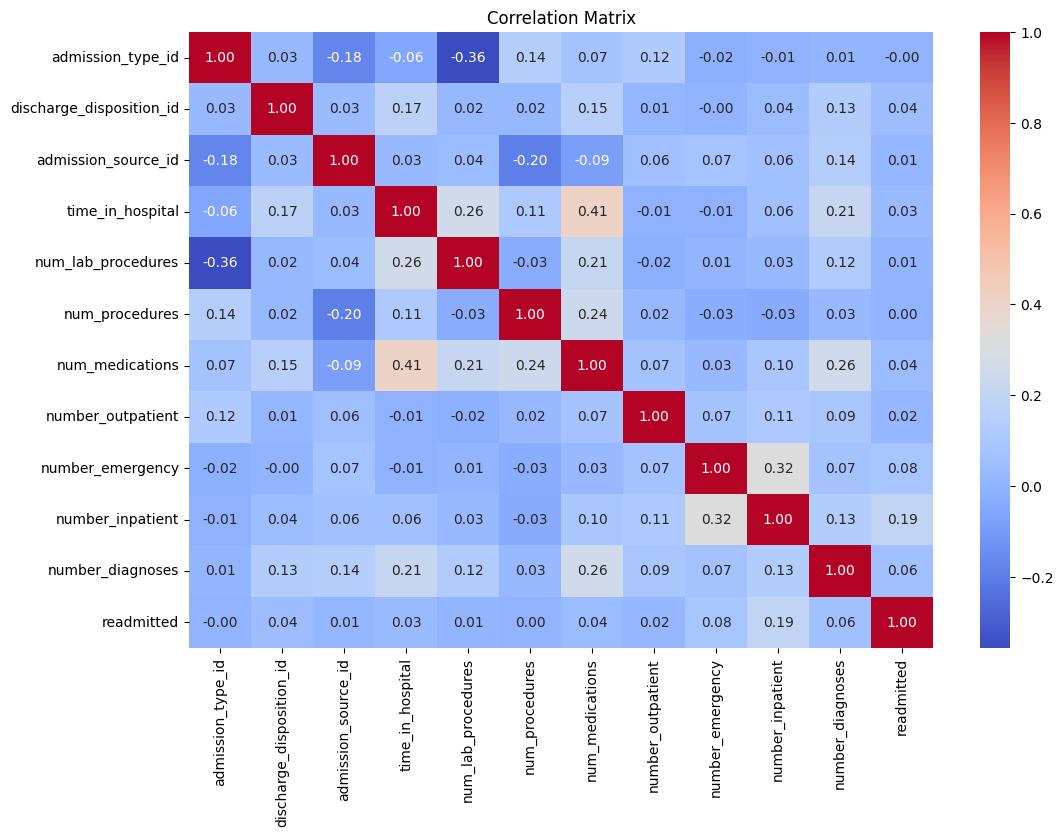

In [188]:
sns.pairplot(cleaned_df)
plt.title('Scatter Matrix Plot')
plt.show()

# Filtering numerical columns
numerical_columns = cleaned_df.select_dtypes(include=[np.number]).columns

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cleaned_df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


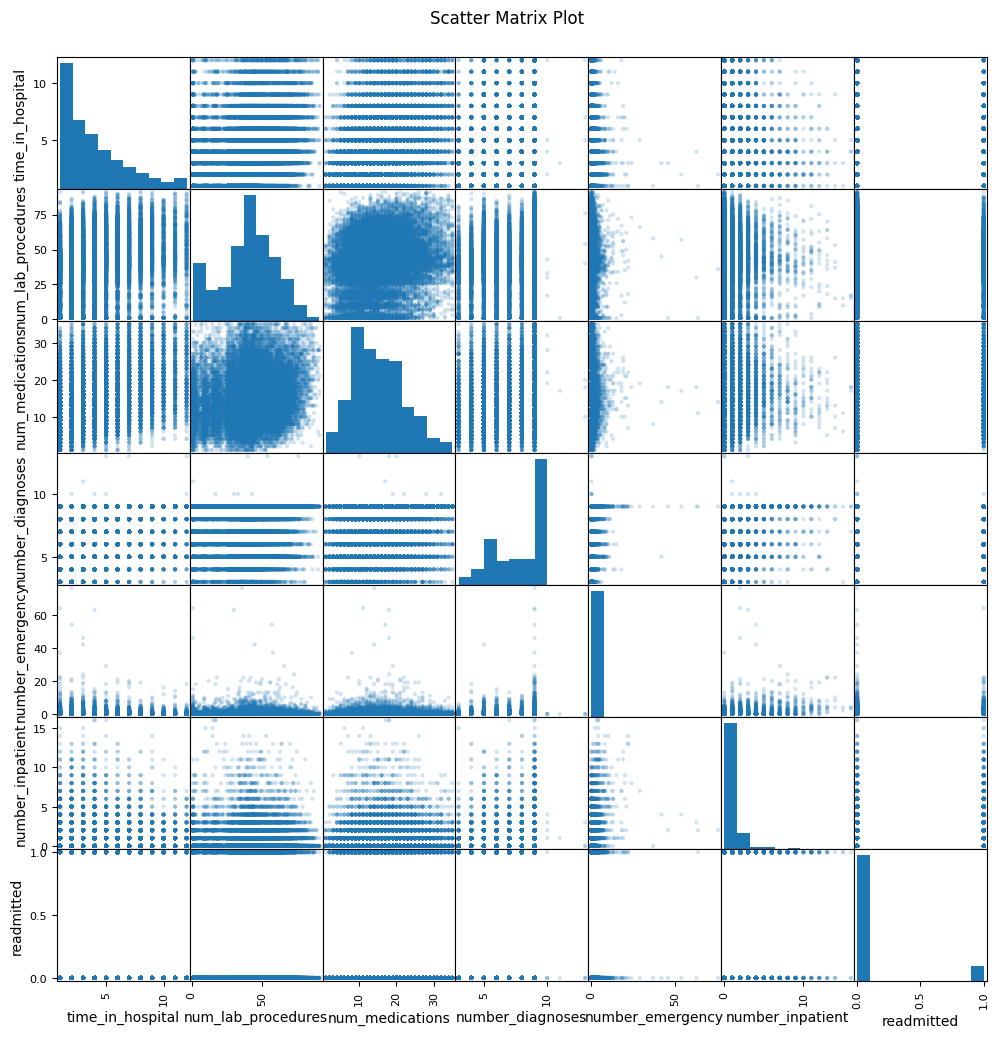

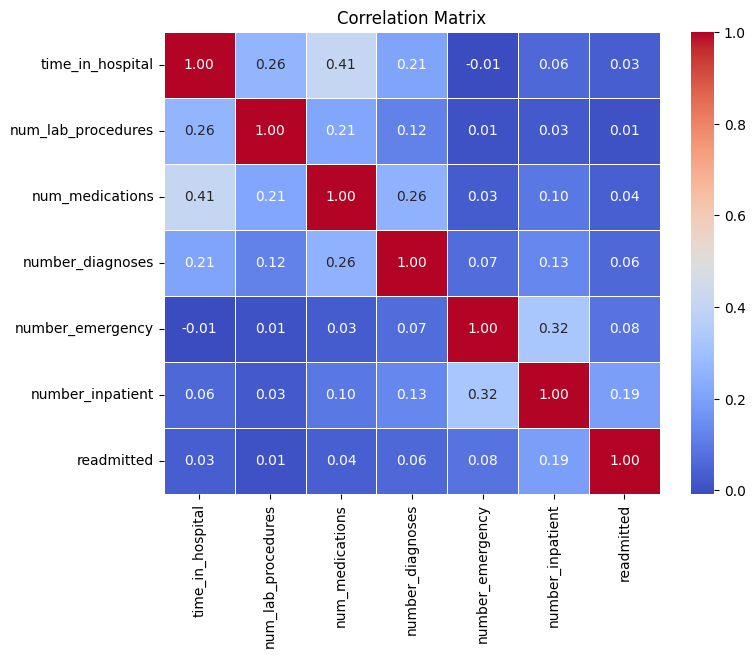

Highly Correlated Feature Pairs:
                    time_in_hospital  num_lab_procedures  num_medications  \
time_in_hospital               False               False            False   
num_lab_procedures             False               False            False   
num_medications                False               False            False   
number_diagnoses               False               False            False   
number_emergency               False               False            False   
number_inpatient               False               False            False   
readmitted                     False               False            False   

                    number_diagnoses  number_emergency  number_inpatient  \
time_in_hospital               False             False             False   
num_lab_procedures             False             False             False   
num_medications                False             False             False   
number_diagnoses               False          

In [189]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Selecting a subset of columns for demonstration 
subset_columns = ['time_in_hospital', 'num_lab_procedures',  
                        'num_medications', 'number_diagnoses', 'number_emergency', 
                        'number_inpatient', 'readmitted']

# Creating a scatter matrix plot
scatter_matrix(cleaned_df[subset_columns], alpha=0.2, figsize=(12, 12), diagonal='hist')
plt.suptitle('Scatter Matrix Plot', y=0.92)
plt.show()

# Displaying the correlation matrix with seaborn heatmap
correlation_matrix = cleaned_df[subset_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identifying highly correlated pairs of features
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1)
print("Highly Correlated Feature Pairs:")
print(highly_correlated_pairs)


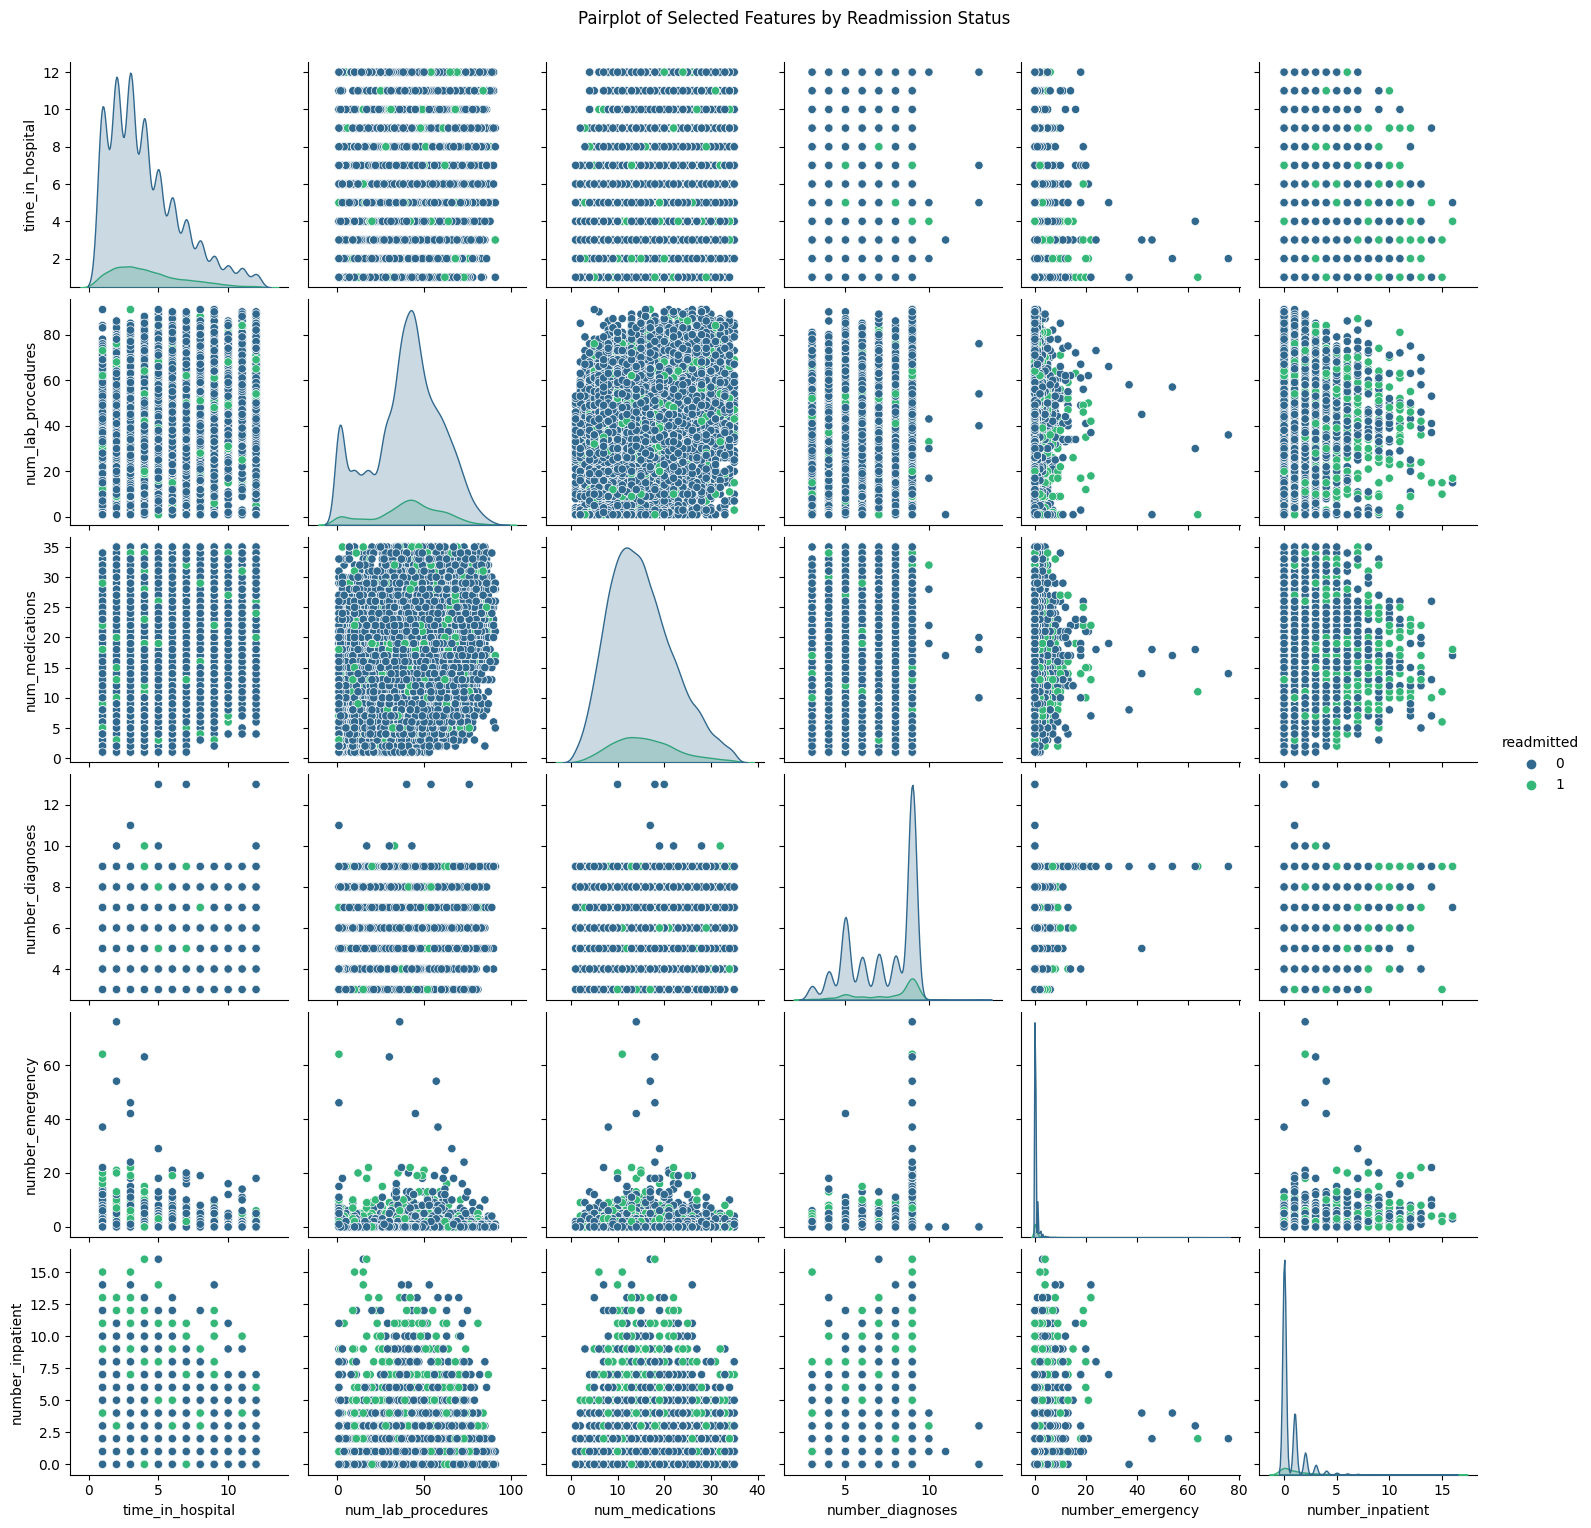

In [190]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
 
# Pairplot to visualize relationships between multiple variables
# Using seaborn's pairplot to create a grid of scatterplots for selected numeric features

sns.pairplot(cleaned_df[['time_in_hospital', 'num_lab_procedures', 
                        'num_medications', 'number_diagnoses', 'number_emergency', 
                        'number_inpatient', 'readmitted']],
             hue='readmitted', diag_kind='kde', palette='viridis')
 
# Adding a title to the pairplot
plt.suptitle('Pairplot of Selected Features by Readmission Status', y=1.02)
 
 
# Display the pairplot
plt.show()

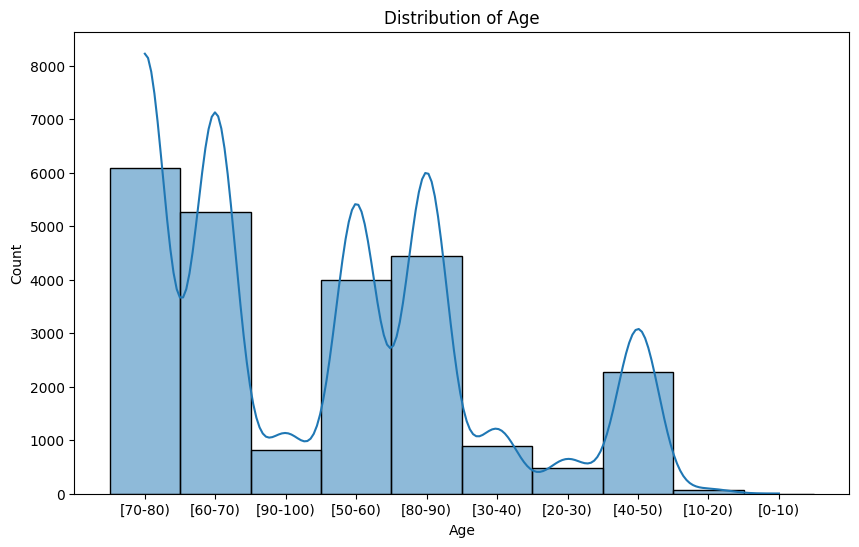

In [191]:
# Distribution of Age

plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_df, x='age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


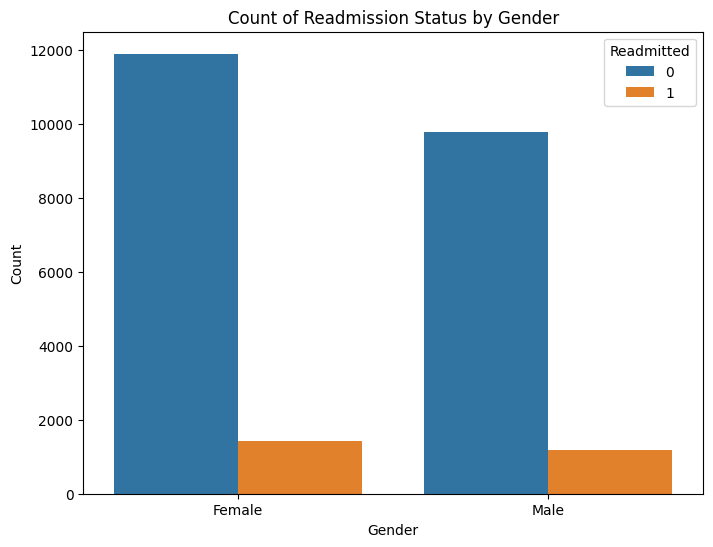

In [192]:
#Distribution of Readmission Status by Gender:
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_df, x='gender', hue='readmitted')
plt.title('Count of Readmission Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()


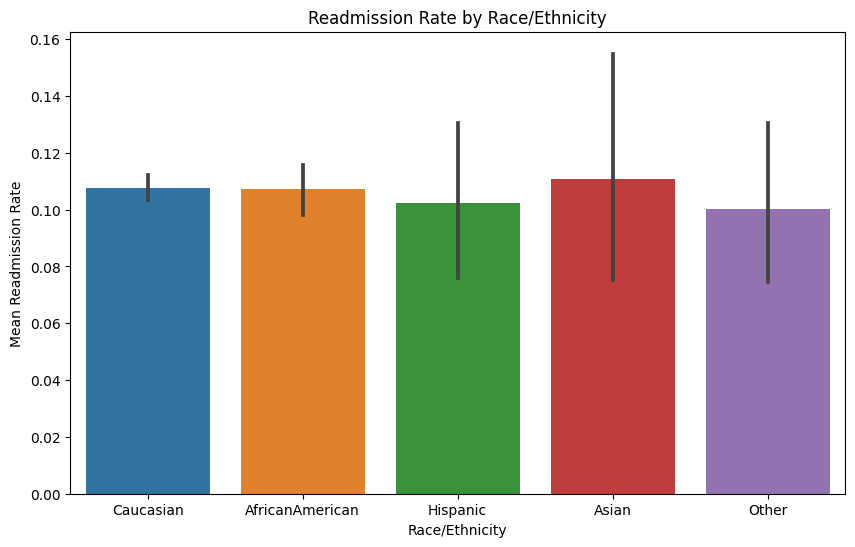

In [193]:
# Readmission Rate by Race/Ethnicity:
plt.figure(figsize=(10, 6))
sns.barplot(data=cleaned_df, x='race', y='readmitted', estimator=np.mean)
plt.title('Readmission Rate by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mean Readmission Rate')
plt.show()


# Modelling

/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

Cross-Validation Mean Accuracy: 0.8923021311917566
Accuracy: 0.8929820950812924
Precision: 0.23529411764705882
Recall: 0.01593625498007968
F1-score: 0.02985074626865672
ROC-AUC: 0.5049844231062895


/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

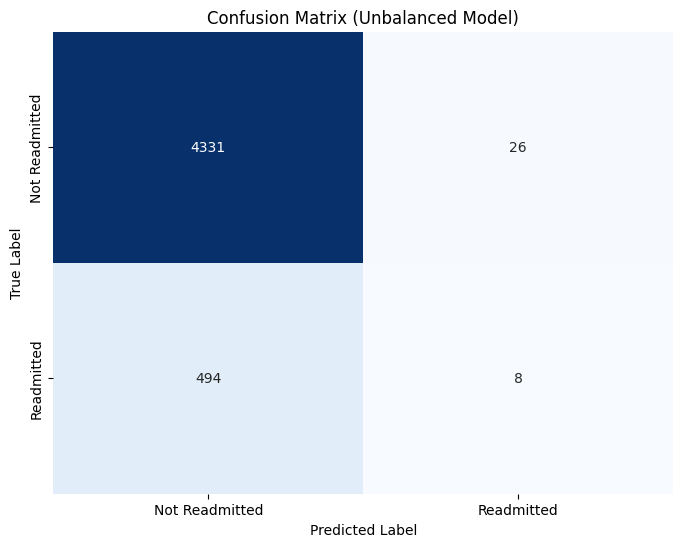


Performance Metrics after Balancing Data:
Accuracy: 0.6602181518831035
Precision: 0.16106194690265488
Recall: 0.5438247011952191
F1-score: 0.24852071005917165
ROC-AUC: 0.6087266723786515


/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


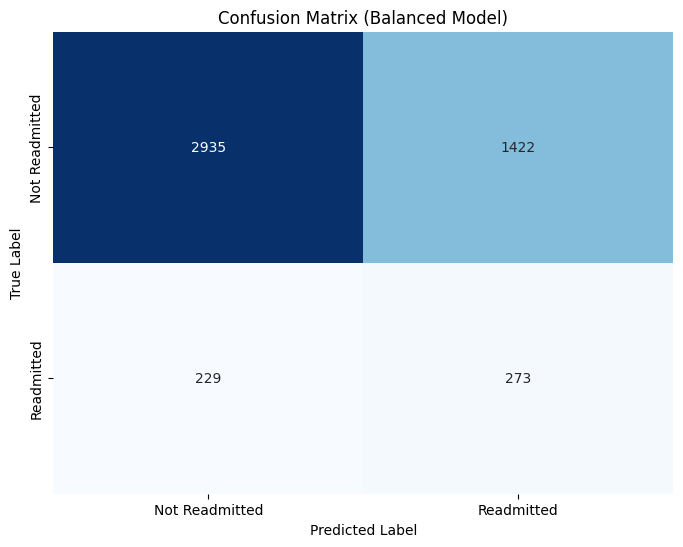

In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Defining numerical and categorical predictors
numerical_predictors = ['time_in_hospital', 'num_lab_procedures', 
                        'num_medications', 'number_diagnoses', 'number_emergency', 
                        'number_inpatient']
categorical_predictors = ['discharge_disposition_id', 'diag_1', 'change', 'diabetesMed']

# Defining preprocessing steps for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_predictors),
        ('cat', categorical_transformer, categorical_predictors)])

# Defining the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Splitting the data into training and test sets
X = cleaned_df[numerical_predictors + categorical_predictors]
y = cleaned_df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model and evaluate its performance
model.fit(X_train, y_train)

# Evaluating model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Evaluating model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Cross-Validation Mean Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

# Calculating confusion matrix for unbalanced model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix for unbalanced model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'], 
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.title('Confusion Matrix (Unbalanced Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Balancing the data using oversampling (RandomOverSampler)
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Training model on balanced data
model_balanced = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression())])
model_balanced.fit(X_resampled, y_resampled)

# Evaluating balanced model
y_pred_balanced = model_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_pred_balanced)

print("\nPerformance Metrics after Balancing Data:")
print("Accuracy:", accuracy_balanced)
print("Precision:", precision_balanced)
print("Recall:", recall_balanced)
print("F1-score:", f1_balanced)
print("ROC-AUC:", roc_auc_balanced)

# Calculating confusion matrix for balanced model
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

# Plotting confusion matrix for balanced model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'], 
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.title('Confusion Matrix (Balanced Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Part 2: Improved model

In [195]:
#Showing the shape of the data.
import numpy as np
import pandas as pd

# Loading the dataset
df_part2 = pd.read_csv('diabetic_data.csv', keep_default_na=False)

# Display the shape of the data
print("Shape of the data:", df_part2.shape)
print("Columns of the DataFrame:", df_part2.columns)

Shape of the data: (101766, 50)
Columns of the DataFrame: Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [196]:
# Dropping columns such as encounter_id because ID's are not required in measuring the performance and weight column has 97% missing values
columns_to_drop = ['encounter_id', 'weight', 'max_glu_serum' , 'A1Cresult']
df_part2 = df_part2.drop(columns=columns_to_drop)
# Display the shape of the data
print("Shape of the data:", df_part2.shape)
print("Columns of the DataFrame:", df_part2.columns)

Shape of the data: (101766, 46)
Columns of the DataFrame: Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [197]:
# Identifying columns containing '?'
columns_with_question_mark = df_part2.columns[df_part2.isin(['?']).any()]

# Replace '?' with NaN only in columns containing '?'
df_part2[columns_with_question_mark] = df_part2[columns_with_question_mark].replace('?', np.nan)

# Summary of missing values after replacing '?'
missing_after = df_part2.isnull().sum()

print("\nMissing Values After Replacement:")
print(missing_after)



Missing Values After Replacement:
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide  

In [198]:
# Replacing '<30' with 1 and '>30' and 'NO' with 0
df_part2['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0}, inplace=True)

# Displaying the unique values in the 'readmitted' column to verify the replacement
print("Unique values in 'readmitted' column after replacement:", df_part2['readmitted'].unique())

print(df_part2['readmitted'])

# Display the shape of the dataframe
print("Shape of the dataframe:", df_part2.shape)


Unique values in 'readmitted' column after replacement: [0 1]
0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 101766, dtype: int64
Shape of the dataframe: (101766, 46)


In [199]:
df_part2.shape
df_part2.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide         

In [200]:
from sklearn.preprocessing import OneHotEncoder

# Selecting columns for OneHotEncoding
columns_to_encode = ['race', 'payer_code', 'gender','medical_specialty' , 'age' , 'metformin' , 'repaglinide' , 'nateglinide','chlorpropamide', 'glimepiride' , 'examide', 'citoglipton' ,'insulin' ,'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change','diabetesMed']

# Initializing OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform selected columns
encoded_features = onehot_encoder.fit_transform(df_part2[columns_to_encode])

# Getting feature names for one-hot encoded columns
encoded_column_names = onehot_encoder.get_feature_names_out(input_features=columns_to_encode)

# Creating a DataFrame for one-hot encoded features
df_encoded = pd.DataFrame(encoded_features, columns=encoded_column_names)

# Dropping original columns from the DataFrame
df_part2 = df_part2.drop(columns=columns_to_encode)

# Concatenating the original DataFrame with the encoded features DataFrame
df_part2 = pd.concat([df_part2, df_encoded], axis=1)

# Displaying the resulting DataFrame
print("Shape of the encoded DataFrame:", df_part2.shape)
print("Columns of the encoded DataFrame:", df_part2.columns)


/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of the encoded DataFrame: (101766, 178)
Columns of the encoded DataFrame: Index(['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=178)


In [201]:



# Drop rows where any of the Diagnosis1, Diagnosis2, or Diagnosis3 columns have missing values because if 
#I use One-hot encoding increases the dimensionality of the feature space, especially for categorical variables with a large number of unique categories. This can lead to a significant increase in the number of features, potentially causing computational overhead and memory issues.
df_part2 = df_part2.dropna(subset=['diag_1', 'diag_2', 'diag_3'])

# Reseting index after dropping rows
df_part2.reset_index(drop=True, inplace=True)

# Print the shape of the DataFrame
print("Shape of DataFrame after removing rows with missing values in Diagnosis1, Diagnosis2, or Diagnosis3:")
print(df_part2.shape)


Shape of DataFrame after removing rows with missing values in Diagnosis1, Diagnosis2, or Diagnosis3:
(100244, 178)


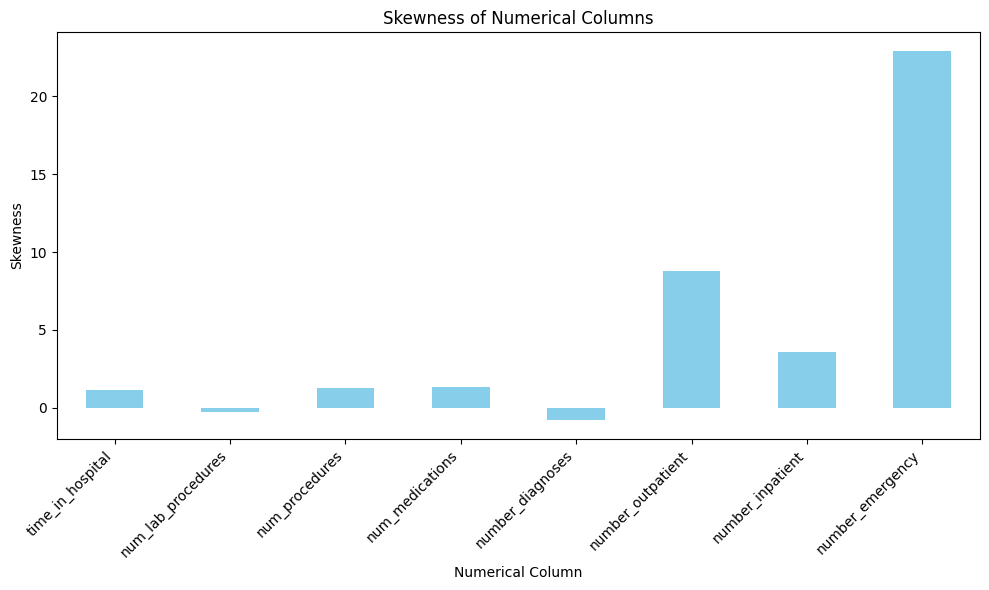

In [202]:
import pandas as pd
import matplotlib.pyplot as plt



# Specifying numerical columns
numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
                     'num_medications', 'number_diagnoses', 'number_outpatient', 
                     'number_inpatient', 'number_emergency']

# Calculating skewness for each numerical column
skewness = df_part2[numerical_columns].skew()

# Creating a bar plot of skewness values so that I would apply IQR method only to those features
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Numerical Column')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [203]:
# Defining a function to remove outliers using IQR
def remove_outliers_iqr(df, columns, threshold= 1.5):

    cleaned_df = df.copy()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Specifying numerical columns for outlier removal
numerical_columns = [ 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses']

# Remove outliers using IQR method for df_part2
cleaned_df_part2 = remove_outliers_iqr(df_part2, numerical_columns)

# Displaying the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers using IQR:", cleaned_df_part2.shape)


Shape of DataFrame after removing outliers using IQR: (91134, 178)


In [204]:
missing_after = cleaned_df_part2.isnull().sum()

print("\nMissing Values After Replacement:")
print(missing_after)



Missing Values After Replacement:
patient_nbr                      0
admission_type_id                0
discharge_disposition_id         0
admission_source_id              0
time_in_hospital                 0
                                ..
metformin-pioglitazone_Steady    0
change_Ch                        0
change_No                        0
diabetesMed_No                   0
diabetesMed_Yes                  0
Length: 178, dtype: int64


In [205]:
# Finding rows with missing values in the DataFrame
rows_with_missing_values = df_part2[df_part2.isna().any(axis=1)]

# Print the rows with missing values
print("Rows with missing values:")
print(rows_with_missing_values)


Rows with missing values:
Empty DataFrame
Columns: [patient_nbr, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, readmitted, race_AfricanAmerican, race_Asian, race_Caucasian, race_Hispanic, race_Other, race_nan, payer_code_BC, payer_code_CH, payer_code_CM, payer_code_CP, payer_code_DM, payer_code_FR, payer_code_HM, payer_code_MC, payer_code_MD, payer_code_MP, payer_code_OG, payer_code_OT, payer_code_PO, payer_code_SI, payer_code_SP, payer_code_UN, payer_code_WC, payer_code_nan, gender_Female, gender_Male, gender_Unknown/Invalid, medical_specialty_AllergyandImmunology, medical_specialty_Anesthesiology, medical_specialty_Anesthesiology-Pediatric, medical_specialty_Cardiology, medica

# Model Building for part 2 

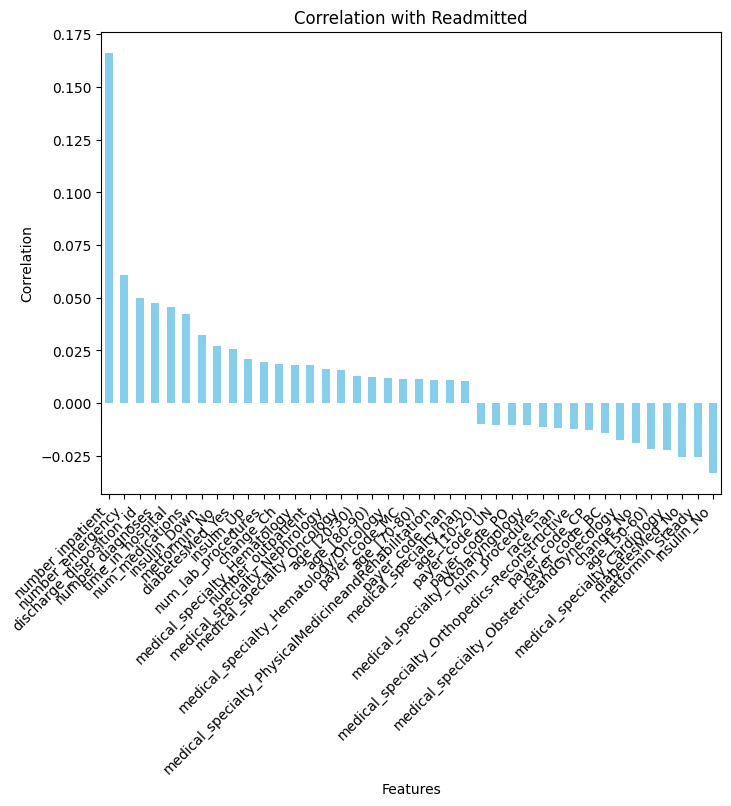

In [206]:
# Dropping non-numeric columns
numeric_df = cleaned_df_part2.select_dtypes(include=['number'])

# Computing the correlation matrix
correlation_matrix = numeric_df.corr()




# Setting the threshold for correlation
threshold = 0.01  # Adjust as needed

# Filtering the correlation matrix to include only highly correlated features with 'readmitted'
highly_correlated_features = correlation_matrix['readmitted'][(correlation_matrix['readmitted'].abs() > threshold) & (correlation_matrix['readmitted'].index != 'readmitted')]

# Plotting the filtered correlations
plt.figure(figsize=(8, 6))
highly_correlated_features.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Correlation with Readmitted')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()



In [207]:
print(cleaned_df_part2.columns)


Index(['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency',
       ...
       'glimepiride-pioglitazone_No', 'glimepiride-pioglitazone_Steady',
       'metformin-rosiglitazone_No', 'metformin-rosiglitazone_Steady',
       'metformin-pioglitazone_No', 'metformin-pioglitazone_Steady',
       'change_Ch', 'change_No', 'diabetesMed_No', 'diabetesMed_Yes'],
      dtype='object', length=178)


In [208]:
cleaned_df_part2.dtypes

patient_nbr                        int64
admission_type_id                  int64
discharge_disposition_id           int64
admission_source_id                int64
time_in_hospital                   int64
                                  ...   
metformin-pioglitazone_Steady    float64
change_Ch                        float64
change_No                        float64
diabetesMed_No                   float64
diabetesMed_Yes                  float64
Length: 178, dtype: object

In [209]:
import pandas as pd



# Selectting numerical columns
numerical_columns = cleaned_df_part2.select_dtypes(include=['int64', 'float64'])

# Selectting categorical columns
categorical_columns = cleaned_df_part2.select_dtypes(include=['object'])

# Print selected columns
print("Numerical Columns:")
print(numerical_columns)

print("\nCategorical Columns:")
print(list(categorical_columns.columns))


Numerical Columns:
        patient_nbr  admission_type_id  discharge_disposition_id  \
0          55629189                  1                         1   
1          86047875                  1                         1   
2          82442376                  1                         1   
3          42519267                  1                         1   
5          84259809                  3                         1   
...             ...                ...                       ...   
100239    100162476                  1                         3   
100240     74694222                  1                         4   
100241     41088789                  1                         1   
100242     31693671                  2                         3   
100243    175429310                  1                         1   

        admission_source_id  time_in_hospital  num_lab_procedures  \
0                         7                 3                  59   
1                         

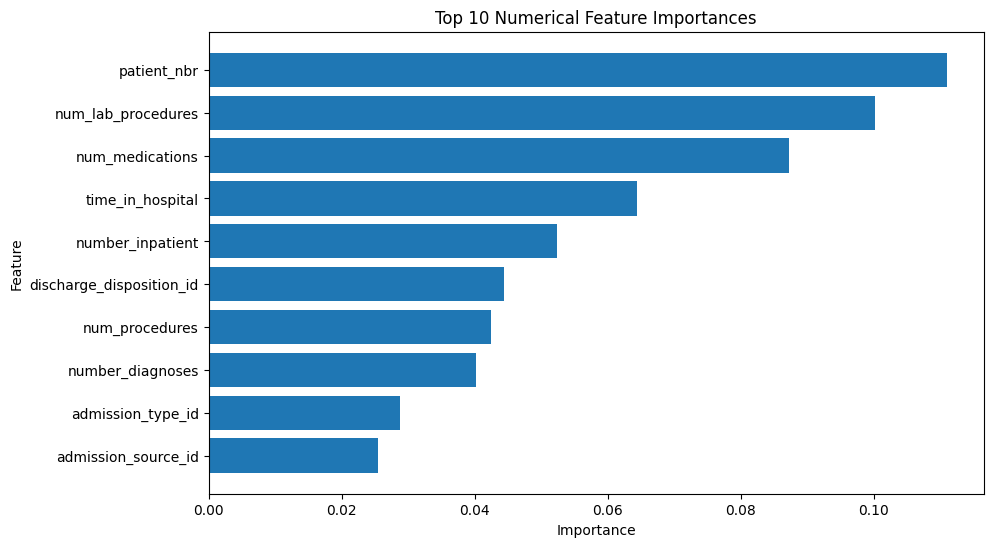

In [210]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Converting numerical_columns1 to a list 
numerical_columns1 = list(numerical_columns)

# Removing 'readmitted' from the list of numerical columns if present
if 'readmitted' in numerical_columns1:
    numerical_columns1.remove('readmitted')

# Separating features and target variable
X = cleaned_df_part2[numerical_columns1]  
y = cleaned_df_part2['readmitted']

# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': numerical_columns1, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Numerical Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [211]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


num_cols = list(numerical_columns1)


# Remove 'readmitted' from the list of numerical columns if present
if 'readmitted' in num_cols:
    num_cols.remove('readmitted')

# Separating features and target variable
X = cleaned_df_part2[num_cols]  # Assuming numerical_columns1 contains numerical column names
y = cleaned_df_part2['readmitted']

# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initializing RFE
rfe = RFE(estimator=rf_classifier, n_features_to_select=15, verbose=1)

# Fit RFE to the data
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

# Print selected features
print("Selected features:")
print(selected_features)


Fitting estimator with 164 features.
Fitting estimator with 163 features.
Fitting estimator with 162 features.
Fitting estimator with 161 features.
Fitting estimator with 160 features.
Fitting estimator with 159 features.
Fitting estimator with 158 features.
Fitting estimator with 157 features.
Fitting estimator with 156 features.
Fitting estimator with 155 features.
Fitting estimator with 154 features.
Fitting estimator with 153 features.
Fitting estimator with 152 features.
Fitting estimator with 151 features.
Fitting estimator with 150 features.
Fitting estimator with 149 features.
Fitting estimator with 148 features.
Fitting estimator with 147 features.
Fitting estimator with 146 features.
Fitting estimator with 145 features.
Fitting estimator with 144 features.
Fitting estimator with 143 features.
Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
F

Cross-Validation Mean Accuracy: 0.8875965297775034
Accuracy: 0.8872551709003127
Precision: 0.4444444444444444
Recall: 0.01171303074670571
F1-score: 0.02282453637660485
ROC-AUC: 0.5049293303072137


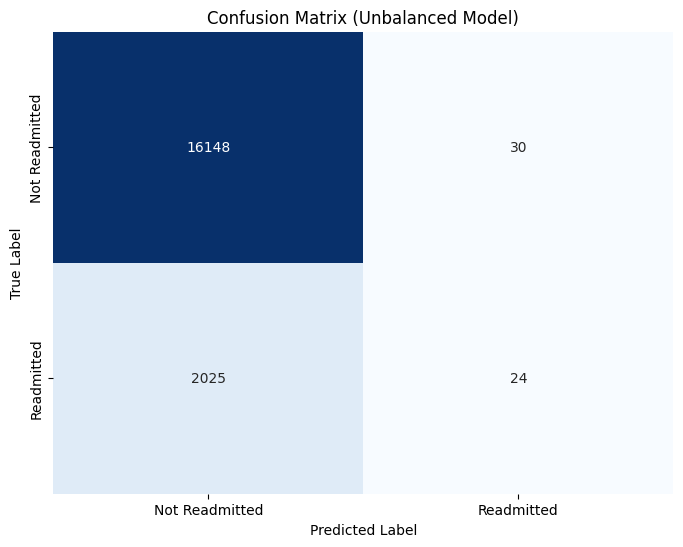


Performance Metrics after Balancing Data:
Accuracy: 0.6921051187798322
Precision: 0.17329910141206675
Recall: 0.4612005856515373
F1-score: 0.2519328179152226
ROC-AUC: 0.5912752835539181


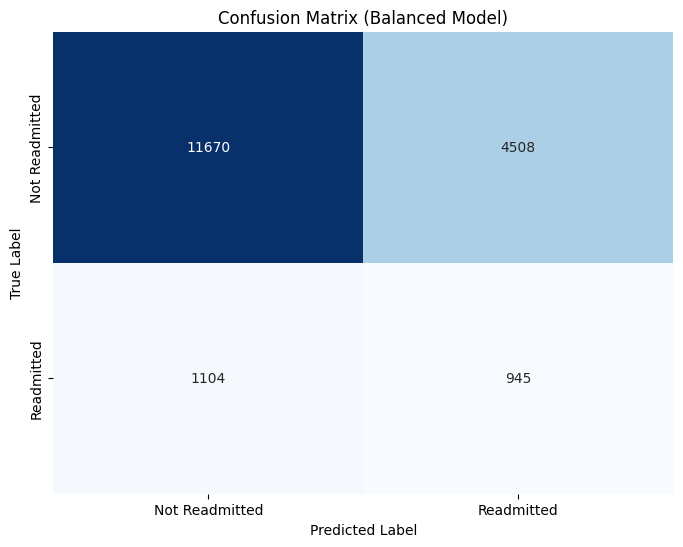

In [212]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical and categorical predictors
numerical_predictors = ['time_in_hospital', 'num_lab_procedures', 'patient_nbr',
                        'num_medications', 'number_diagnoses', 'number_emergency', 
                        'number_inpatient','number_outpatient']
categorical_predictors = ['discharge_disposition_id','admission_type_id', 'admission_source_id', 'race_Caucasian','payer_code_MC','medical_specialty_nan']

 
       
       
      
        
# Define preprocessing steps for numerical and categorical data
numeric_transformer = StandardScaler()

# Combine preprocessing steps for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_predictors)])

# Define the model with max_iter parameter
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])  # Setting max_iter to 1000

# Split the data into training and test sets
X = cleaned_df_part2[numerical_predictors + categorical_predictors]
y = cleaned_df_part2['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model and evaluate its performance
model.fit(X_train, y_train)

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Cross-Validation Mean Accuracy:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

# Calculate confusion matrix for unbalanced model
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for unbalanced model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'], 
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.title('Confusion Matrix (Unbalanced Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Balance data using oversampling (RandomOverSampler)
oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Train model on balanced data
model_balanced = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(max_iter=1000))])  # Setting max_iter to 1000
model_balanced.fit(X_resampled, y_resampled)

# Evaluate balanced model
y_pred_balanced = model_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced)
recall_balanced = recall_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_pred_balanced)

print("\nPerformance Metrics after Balancing Data:")
print("Accuracy:", accuracy_balanced)
print("Precision:", precision_balanced)
print("Recall:", recall_balanced)
print("F1-score:", f1_balanced)
print("ROC-AUC:", roc_auc_balanced)

# Calculate confusion matrix for balanced model
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

# Plot confusion matrix for balanced model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_balanced, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Not Readmitted', 'Readmitted'], 
            yticklabels=['Not Readmitted', 'Readmitted'])
plt.title('Confusion Matrix (Balanced Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# K means

/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


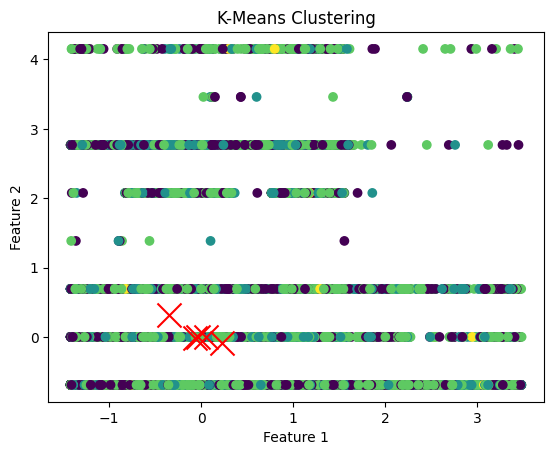

In [213]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Removing non-numeric columns
numeric_cols = cleaned_df_part2.select_dtypes(include=['number']).columns
numeric_df = cleaned_df_part2[numeric_cols]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

#  Applying K-Means Algorithm


n_clusters = 5

# Initializing KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the Model
kmeans.fit(scaled_data)

#  Visualizing the Clusters

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#  Evaluating the Clustering



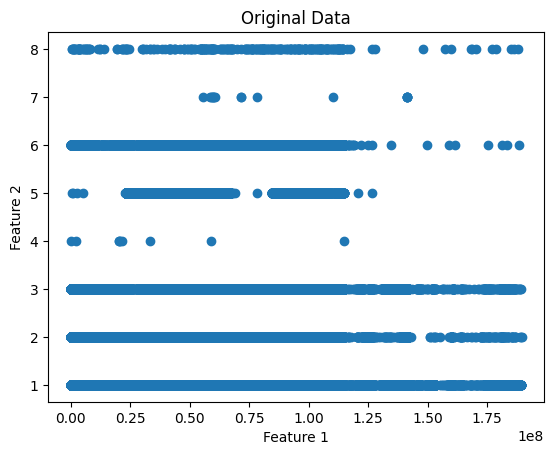

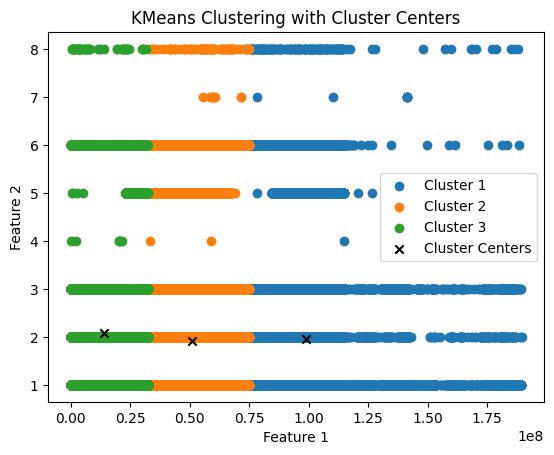

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Extracting only the numerical columns from the DataFrame
numeric_cols = cleaned_df_part2.select_dtypes(include=np.number)
features = numeric_cols.values

# Visualizing the data
plt.scatter(features[:, 0], features[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.show()

# Fitting KMeans model
kmeans = KMeans(n_clusters=3, init='random', max_iter=100, random_state=10, n_init='auto')
kmeans.fit(features)

# Scattering plot of the clustered data points
plt.scatter(features[kmeans.labels_==0, 0], features[kmeans.labels_==0, 1], label='Cluster 1')
plt.scatter(features[kmeans.labels_==1, 0], features[kmeans.labels_==1, 1], label='Cluster 2')
plt.scatter(features[kmeans.labels_==2, 0], features[kmeans.labels_==2, 1], label='Cluster 3')

# Plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', label='Cluster Centers')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering with Cluster Centers')
plt.legend()
plt.show()


/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


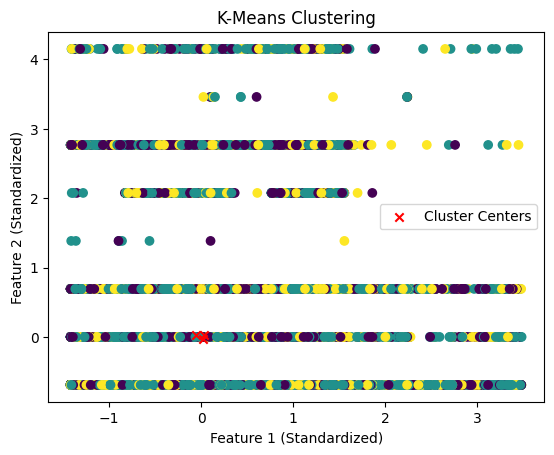

Cluster 0 - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5221
           1       0.57      1.00      0.72      6847

    accuracy                           0.57     12068
   macro avg       0.28      0.50      0.36     12068
weighted avg       0.32      0.57      0.41     12068

Cluster 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7603
           1       0.53      1.00      0.69      8629

    accuracy                           0.53     16232
   macro avg       0.27      0.50      0.35     16232
weighted avg       0.28      0.53      0.37     16232

Cluster 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3262
           1       0.00      0.00      0.00       798

    accuracy                           0.80      4060
   macro avg       0.40

/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gopinathvaradarajan/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [218]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import numpy as np



# Extracting only the numerical columns from the DataFrame
numeric_cols = cleaned_df_part2.select_dtypes(include=np.number)
features = numeric_cols.values

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Visualizing the clusters
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Cluster Centers')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# Adding cluster labels to the DataFrame
cleaned_df_part2['Cluster'] = clusters

# Selecting only numerical columns for SMOTE resampling
X = cleaned_df_part2.select_dtypes(include=np.number)
y = cleaned_df_part2['readmitted']

# Balancing the data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Training a logistic regression classifier on each cluster
cluster_classifiers = {}
for cluster_label in np.unique(clusters):
    cluster_X_train = X_train[X_train['Cluster'] == cluster_label].drop(columns=['Cluster'])
    cluster_y_train = y_train[X_train['Cluster'] == cluster_label]
    
    # Initialize and train the classifier
    classifier = LogisticRegression()
    classifier.fit(cluster_X_train, cluster_y_train)
    cluster_classifiers[cluster_label] = classifier

# Evaluating the performance of cluster-based classifiers
for cluster_label, classifier in cluster_classifiers.items():
    cluster_X_test = X_test[X_test['Cluster'] == cluster_label].drop(columns=['Cluster'])
    cluster_y_test = y_test[X_test['Cluster'] == cluster_label]
    
    # Making predictions
    y_pred = classifier.predict(cluster_X_test)
    
    # Print classification report
    print(f"Cluster {cluster_label} - Classification Report:")
    print(classification_report(cluster_y_test, y_pred))
